In [2]:
import numpy as np
import pandas as pd

import torch as tr
import torch.nn as nn

from sklearn import datasets
import matplotlib.pyplot as plt



### Gradient Descent using torch

In [3]:
# 1. design our model (input, output size, forward pass)
# 2. construct loss and optimizer
# 3. training loop
#       - forward pass: compute prediction
#       - backward pass: gradient
#       - update weights 


In [4]:
X = tr.tensor([1,2,3,4], dtype=tr.float32)
Y = tr.tensor([2,4,6,8], dtype=tr.float32)

w = tr.tensor(0.0, dtype = tr.float32, requires_grad= True)

# model prediction
def forward(x):
    return w*x


# # gradient
# # MSE = 1/N *(w*x-y)**2
# # dj/dw = 1/N 2x (w*x -y)
# def gradient(x, y, y_predicted):
#     return np.dot(2*x, y_predicted-y).mean()

print(f"Prediction before training : f(5) = {forward(5):.3f}")

learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = tr.optim.SGD([w], lr = learning_rate)


for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)
    l = loss(Y, y_pred)

    # gradient = backward pass
    l.backward() # dl/dw

    optimizer.step()
    # with tr.no_grad():
    #     w -= learning_rate * w.grad

    # zero gradients
    # w.grad.zero_()
    optimizer.zero_grad()
    
    
    if epoch %10 ==0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:,.8f}')


print(f"Prediction after training : f(5) = {forward(5):.3f}")



Prediction before training : f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training : f(5) = 10.000


In [5]:
X = tr.tensor([[1],[2],[3],[4]], dtype=tr.float32)
Y = tr.tensor([[2],[4],[6],[8]], dtype=tr.float32)

X_test = tr.tensor([5], dtype = tr.float32)

n_samples, n_features = X.shape
input_size = n_features
output_size = n_features
# dont need weights when implemented in nn module
# w = tr.tensor(0.0, dtype = tr.float32, requires_grad= True)

# model prediction

# def forward(x):
#     return w*x

# creating custom Linear model in pytorch

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)

# calling custom model here
model = LinearRegression(input_size, output_size)

# replacement with nn model
# model = nn.Linear(input_size, output_size)


# # gradient
# # MSE = 1/N *(w*x-y)**2
# # dj/dw = 1/N 2x (w*x -y)
# def gradient(x, y, y_predicted):
#     return np.dot(2*x, y_predicted-y).mean()

print(f"Prediction before training : f(5) = {model(X_test).item():.3f}")

learning_rate = 0.01
n_iters = 50

loss = nn.MSELoss()
optimizer = tr.optim.SGD(model.parameters(), lr = learning_rate)


for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(X)
    l = loss(Y, y_pred)

    # gradient = backward pass
    l.backward() # dl/dw

    optimizer.step()
    # with tr.no_grad():
    #     w -= learning_rate * w.grad

    # zero gradients
    # w.grad.zero_()
    optimizer.zero_grad()
    
    
    if epoch %10 ==0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:,.8f}')


print(f"Prediction after training : f(5) = {model(X_test).item():.3f}")



Prediction before training : f(5) = -5.259
epoch 1: w = -0.415, loss = 75.00614929
epoch 11: w = 1.570, loss = 1.94415760
epoch 21: w = 1.890, loss = 0.05366173
epoch 31: w = 1.943, loss = 0.00455436
epoch 41: w = 1.952, loss = 0.00309959
Prediction after training : f(5) = 9.906


# Linear Regression using pytorch

In [6]:
# 0. prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 1)
X = tr.from_numpy(X_numpy.astype(np.float32))
y = tr.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# 1. model
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

# 2. loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = tr.optim.SGD(model.parameters(), lr = learning_rate)

# 3. training loop
num_epoch = 100
for epoch in range(num_epoch):
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # backward pass
    loss.backward()

    # update weights
    optimizer.step()

    optimizer.zero_grad()

    if (epoch+1) %10 ==0:
        print(f'epoch {epoch+1}: loss = {loss.item():,.4f}')



# plot
predicted = model(X).detach().numpy()

epoch 10: loss = 4,360.9785
epoch 20: loss = 3,256.1672
epoch 30: loss = 2,456.1372
epoch 40: loss = 1,876.2242
epoch 50: loss = 1,455.4745
epoch 60: loss = 1,149.9404
epoch 70: loss = 927.8964
epoch 80: loss = 766.4099
epoch 90: loss = 648.8864
epoch 100: loss = 563.3046


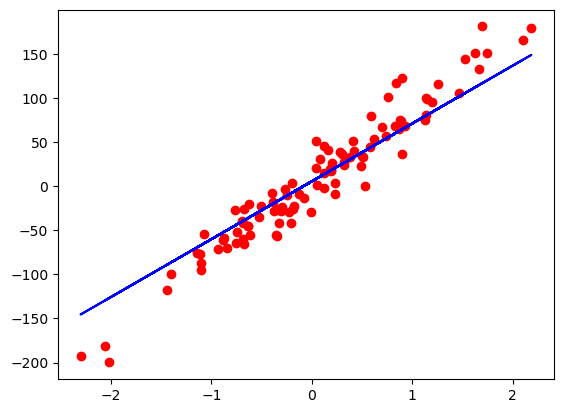

In [7]:
plt.plot(X_numpy, y_numpy, "ro")
plt.plot(X_numpy, predicted, "b")
plt.show()

# Logistic Regression using pytorch

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [9]:
# 0. prepare data
breast_cancer = datasets.load_breast_cancer()
X,y = breast_cancer.data, breast_cancer.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train = tr.from_numpy(X_train.astype(np.float32))
X_test = tr.from_numpy(X_test.astype(np.float32))
y_train = tr.from_numpy(y_train.astype(np.float32))
y_test = tr.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)


print(n_samples, n_features)

569 30


In [10]:
# 1. model
class Model_LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(Model_LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_predicted = tr.sigmoid(self.linear(x))
        return y_predicted

model = Model_LogisticRegression(n_features)

# 2. loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = tr.optim.SGD(model.parameters(), lr = learning_rate)

# 3. training loop
num_epoch = 100
for epoch in range(num_epoch):
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)

    # backward pass
    loss.backward()

    # update weights
    optimizer.step()

    # zero gradients
    optimizer.zero_grad()

    if (epoch+1) %10 ==0:
        print(f'epoch {epoch+1}: loss = {loss.item():,.4f}')

with tr.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    accuracy = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f"Accuracy = {accuracy:,.4f}")

# plot
# predicted = model(X).detach().numpy()

epoch 10: loss = 0.6281
epoch 20: loss = 0.5244
epoch 30: loss = 0.4562
epoch 40: loss = 0.4077
epoch 50: loss = 0.3713
epoch 60: loss = 0.3428
epoch 70: loss = 0.3197
epoch 80: loss = 0.3006
epoch 90: loss = 0.2844
epoch 100: loss = 0.2704
Accuracy = 0.8860
